In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [72]:
ds = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\1.5.1 data\armenian_pubs.csv')
pd.options.display.max_rows = 180
ds['Occupation'] = ds.Occupation.str.strip()
ds['Fav_Pub'] = ds.Fav_Pub.str.strip()
ds['Fav_Pub'] = ds.Fav_Pub.str.lower()
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('^the ','')
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('i have none','do not have one')
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('37 pub','pub 37')
ds['Freq'] = ds.Freq.str.replace('Several times in a month','Sometimes')
ds['Freq'] = ds.Freq.str.replace('^rarely.+','Rarely')
ds['Freq'] = ds.Freq.str.replace('Several times a week','Often')
ds['Lifestyle'] = ds.Lifestyle.str.strip()
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Adventur.+','Adventurous')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Busy.+','Busy')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Rock.+','Musical')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Business.+','Active')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Sport\,.+','Active')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Art','Artsy')
print(ds)

                        Timestamp  Age  Gender     Income  \
0    2017/02/25 10:52:03 PM GMT+4   19    Male   100000.0   
1    2017/02/25 10:53:19 PM GMT+4   19  Female    50000.0   
2    2017/02/25 10:54:05 PM GMT+4   20    Male   100000.0   
3    2017/02/25 10:55:09 PM GMT+4   18    Male        0.0   
4    2017/02/25 10:55:38 PM GMT+4   19  Female   130000.0   
5    2017/02/25 10:55:39 PM GMT+4   19    Male    90000.0   
6    2017/02/25 10:55:41 PM GMT+4   18  Female        0.0   
7    2017/02/25 10:55:45 PM GMT+4   19  Female        0.0   
8    2017/02/25 10:56:17 PM GMT+4   19    Male    80000.0   
9    2017/02/25 10:56:45 PM GMT+4   19    Male   150000.0   
10   2017/02/25 10:56:52 PM GMT+4   20  Female    80000.0   
11   2017/02/25 10:56:56 PM GMT+4   18    Male    90000.0   
12   2017/02/25 10:57:00 PM GMT+4   18  Female        0.0   
13   2017/02/25 10:57:58 PM GMT+4   19    Male   200000.0   
14   2017/02/25 10:58:12 PM GMT+4   19    Male   120000.0   
15   2017/02/25 10:58:19

Hypothesis

If we take data from this set and add a wider range of ages, as well as a higher sample of all ages, we can test for a corrlelation between a lot of the variables and willingness to spend. This could be useful to help bars in this area attract a clientele willing to spend the most amount of money. We would expect willingness to spend to go up as people get older and then hit a peak around middle age and drop back down again. We would expect income to increase directly with willingness to spend. We would expect men to spend more money than women. We would expect people who are working to spend more than students and so on.

In [73]:
ds['Timestamp'] = ds['Timestamp'].astype(str).str[0:10]
timestamp = ds.groupby('Timestamp').size()
print(timestamp)

Timestamp
2017/02/25    58
2017/02/26    65
2017/02/27     9
2017/02/28     1
2017/03/01     1
2017/03/02    35
2017/03/03     4
2017/03/04     1
2017/03/05     1
dtype: int64


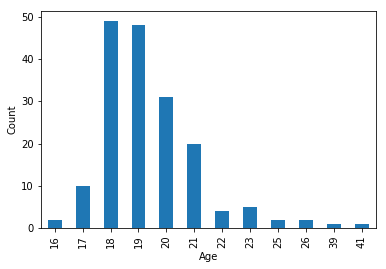

In [74]:
age = ds.groupby('Age').size()
ageplot = age.plot.bar()
ageplot.set_ylabel('Count')
plt.show()

In [75]:
gender = ds.groupby('Gender').size()
print(gender)

Gender
Female    102
Male       73
dtype: int64


In [76]:
income1 = ds.groupby(pd.cut(ds['Income'], np.arange(0,225000,25000), include_lowest=True)).size()
income2 = ds.groupby(pd.cut(ds['Income'], np.arange(200000,1100000,100000))).size()
income3 = ds.groupby(pd.cut(ds['Income'], np.arange(1000000,4600000,3500000))).size()
print(income1, income2, income3)

Income
(-0.001, 25000.0]       56
(25000.0, 50000.0]      30
(50000.0, 75000.0]      18
(75000.0, 100000.0]     30
(100000.0, 125000.0]     6
(125000.0, 150000.0]    10
(150000.0, 175000.0]     1
(175000.0, 200000.0]    11
dtype: int64 Income
(200000, 300000]     6
(300000, 400000]     2
(400000, 500000]     0
(500000, 600000]     0
(600000, 700000]     1
(700000, 800000]     0
(800000, 900000]     2
(900000, 1000000]    0
dtype: int64 Income
(1000000, 4500000]    1
dtype: int64


In [77]:
occupation = ds.groupby('Occupation').size().sort_values(ascending=False)
print(occupation)

Occupation
Student                             122
Student + working                    40
Working                              10
army                                  1
Entrepreneur / Software Engineer      1
CEO                                   1
dtype: int64


In [78]:
favorite_pub = ds.groupby('Fav_Pub').size().sort_values(ascending = False)
print(favorite_pub)

Fav_Pub
calumet               27
station               26
i don't like pubs     16
irish                 16
pepper                10
cantaloupe             9
venue                  8
liberty                7
pub 37                 6
tom collins            4
bulldog                3
das                    3
hemingway              3
fiction                3
bob's                  2
do not have one        2
ulixanyan art club     2
paulaner               2
paparazzi              2
beatles                2
void                   2
beer academy           1
dargett                1
yankee                 1
eden                   1
kaptyorka              1
wild west              1
pechenu bagher         1
pub 007                1
red bull               1
simona                 1
speak easy             1
varonna                1
barcode                1
dtype: int64


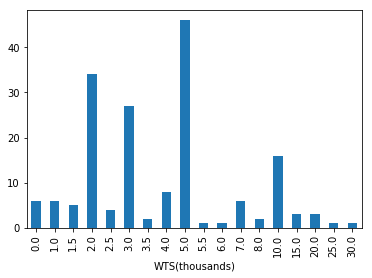

In [79]:
ds=ds.rename(columns = {'WTS':'WTS(thousands)'})
ds['WTS(thousands)'] = ds['WTS(thousands)'] / 1000
willingness_to_spend = ds.groupby('WTS(thousands)').size()
willingness_to_spend.plot.bar()
plt.show()

In [80]:
frequency = ds.groupby('Freq').size()
print(frequency)

Freq
Often        20
Rarely       94
Sometimes    61
dtype: int64


In [81]:
stratum = ds.groupby('Stratum').size()
print(stratum)

Stratum
Capital    139
Rural        3
Urban       33
dtype: int64


## Background

The dataset collected from an online survey questionnaire includes behavioral, psychographic, geographic and demographic information about Armenian pubs.

The data has been intended for an independent project organized by the students of the American University of Armenia solely for educational purposes.

This data is unique as the pubs sector in Armenia has not been reasearched so far.

## Issues with Initial experiment

Timestamp: collected a majority of the data over one weekend and most of the remaining data the Thursday after the initial weekend

Age: Does not reflect the demographics of an area at all because the students probably did not target a wide enough range of people

Occupation: Online survey seems to have only reached students

Frequency: Most responders do not go to pubs even semi regularly 

Stratum: Huge proportion of people in the capital

## Experiment

**Rollout Plan**: Our new experiment needs to try and fix some of the issues we found in the data set. Online rollout similar to the one used in the original is probably fine because people who use the internet are likely to have at least similar age demographics to people who frequent pubs (younger people use computers more often and also spend more time out drinking). 

The major issue is it seems the experiment was only advertised to students in either a specific area of the capital or a specific school. There will need to be an overhauled advertisement scheme in order to diversify the demographics in the area. Putting fliers for the survey website in all the bars in the area is likely a good method to increase the variance in the demographics. Since this is no longer related directly to a school, there will need to be some sort of incentive so the people reading the flier will respond. A sweepstakes is probably the most cost efficient way to do this. Something like \$200 gift card to your favoirte bar for 5 winners.

A quick google search says the population of Armenia, where this survey was taken, is almost 3 million. Using a 95% confidence interval and confidence level, we would need a sample size of roughly ten thousand people.

Because we are completely changing up the advertisement scheme of the survey, it is hard to say how long the experiemnt will need to take place in order to acquire a reasonable sample size. Our advertisement method is much farther reaching, so we will assume twice as many people will respond each week or 172*2=344 from the original survey. With this assumption, we will need to run the survey for 29 weeks, or just over 7 months. Obviously this assumption will need to be tested as the results are collected but this is a good place to start.

Because of the new rollout plan, it is important to test to see if people are filling in duplicates in order to enter the sweepstakes multiple times. The best way is to block an entry from an ip once there has already been one entry. There should also be a mandatory name and date of birth, or something along those lines, to see if people with multiple phones or computers are entering more than once.